Data from Moon file

/Users/dosya/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


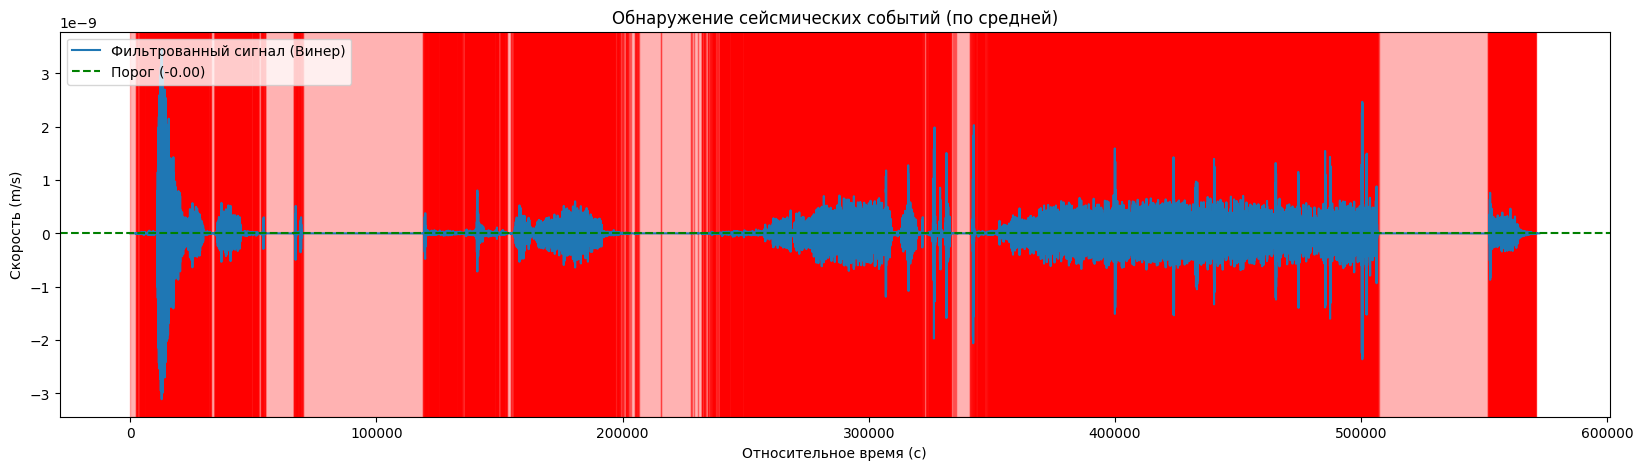

Обнаружено 32355 сейсмических событий.
Событие 1: Начало - 0, Конец - 2146, Длительность - 2146 сэмплов
Событие 2: Начало - 2167, Конец - 2220, Длительность - 53 сэмплов
Событие 3: Начало - 2227, Конец - 2510, Длительность - 283 сэмплов
Событие 4: Начало - 2519, Конец - 2556, Длительность - 37 сэмплов
Событие 5: Начало - 2573, Конец - 2575, Длительность - 2 сэмплов
Событие 6: Начало - 2587, Конец - 2633, Длительность - 46 сэмплов
Событие 7: Начало - 2637, Конец - 2734, Длительность - 97 сэмплов
Событие 8: Начало - 2736, Конец - 2743, Длительность - 7 сэмплов
Событие 9: Начало - 2744, Конец - 2792, Длительность - 48 сэмплов
Событие 10: Начало - 2793, Конец - 2800, Длительность - 7 сэмплов
Событие 11: Начало - 2805, Конец - 2807, Длительность - 2 сэмплов
Событие 12: Начало - 2887, Конец - 2924, Длительность - 37 сэмплов
Событие 13: Начало - 2965, Конец - 3196, Длительность - 231 сэмплов
Событие 14: Начало - 3226, Конец - 3283, Длительность - 57 сэмплов
Событие 15: Начало - 3297, Конец - 

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import wiener

# Функция для загрузки данных
file_path = './data/lunar/test/data/S12_GradeB/xa.s12.00.mhz.1969-12-16HR00_evid00006.csv'
data = pd.read_csv(file_path)

# Использование столбца 'velocity(m/s)' как сигнал
signal = data['velocity(m/s)'].values

# Применение фильтра Винера для удаления шума
filtered_signal_wiener = wiener(signal, mysize=29)

# Рассчитываем среднее значение сигнала и определяем порог
signal_mean = np.mean(filtered_signal_wiener)

# Порог в 2 раза больше среднего значения (можно настраивать)
threshold = signal_mean * 2

# Обнаружение событий на основе порога
def detect_events(signal, threshold):
    events = []
    in_event = False
    start = 0
    
    for i in range(len(signal)):
        if signal[i] > threshold and not in_event:
            # Начало события
            in_event = True
            start = i
        elif signal[i] <= threshold and in_event:
            # Конец события
            in_event = False
            end = i
            events.append((start, end))
    
    return events

events = detect_events(filtered_signal_wiener, threshold)

# Визуализация обнаруженных событий
plt.figure(figsize=(20, 5))
times = np.arange(len(signal))
plt.plot(times, filtered_signal_wiener, label='Фильтрованный сигнал (Винер)')
plt.axhline(y=threshold, color='green', linestyle='--', label=f'Порог ({threshold:.2f})')

for start, end in events:
    plt.axvspan(start, end, color='red', alpha=0.3)

plt.title("Обнаружение сейсмических событий (по средней)")
plt.xlabel("Относительное время (с)")
plt.ylabel("Скорость (m/s)")
plt.legend()
plt.show()

# Вывод результатов
print(f"Обнаружено {len(events)} сейсмических событий.")
for i, (start, end) in enumerate(events):
    print(f"Событие {i+1}: Начало - {start}, Конец - {end}, Длительность - {end - start} сэмплов")

Data from Mar file 

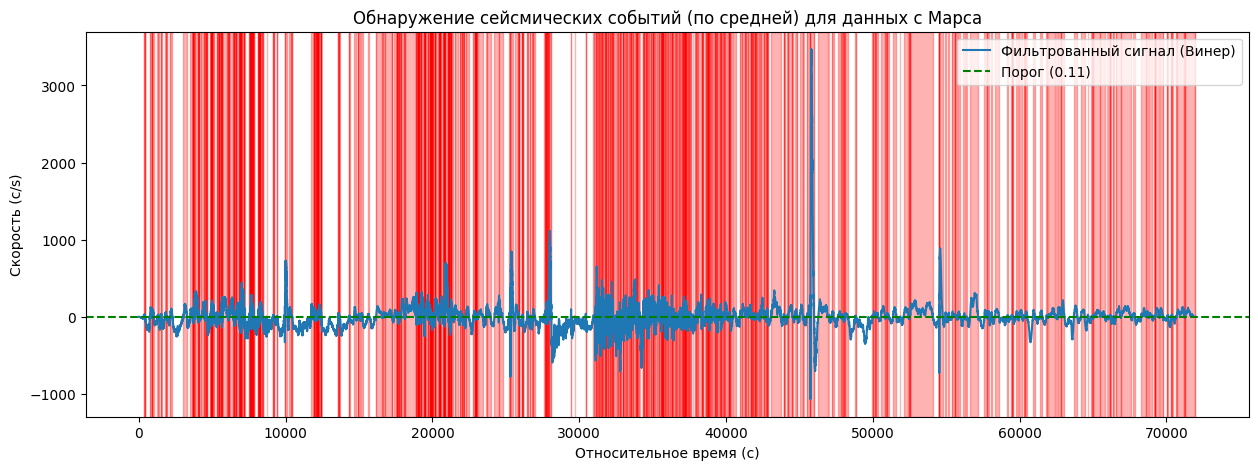

Обнаружено 1049 сейсмических событий.
Событие 1: Начало - 320, Конец - 325, Длительность - 5 сэмплов
Событие 2: Начало - 327, Конец - 409, Длительность - 82 сэмплов
Событие 3: Начало - 412, Конец - 413, Длительность - 1 сэмплов
Событие 4: Начало - 417, Конец - 419, Длительность - 2 сэмплов
Событие 5: Начало - 420, Конец - 421, Длительность - 1 сэмплов
Событие 6: Начало - 750, Конец - 751, Длительность - 1 сэмплов
Событие 7: Начало - 752, Конец - 865, Длительность - 113 сэмплов
Событие 8: Начало - 866, Конец - 874, Длительность - 8 сэмплов
Событие 9: Начало - 876, Конец - 878, Длительность - 2 сэмплов
Событие 10: Начало - 879, Конец - 883, Длительность - 4 сэмплов
Событие 11: Начало - 885, Конец - 1024, Длительность - 139 сэмплов
Событие 12: Начало - 1261, Конец - 1264, Длительность - 3 сэмплов
Событие 13: Начало - 1274, Конец - 1275, Длительность - 1 сэмплов
Событие 14: Начало - 1277, Конец - 1345, Длительность - 68 сэмплов
Событие 15: Начало - 1489, Конец - 1490, Длительность - 1 сэмп

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import wiener

# Функция для загрузки данных
file_path = './data/mars/test/data/XB.ELYSE.02.BHV.2019-05-23HR02_evid0041.csv'
data = pd.read_csv(file_path)

# Использование столбца 'velocity(c/s)' как сигнал
signal = data['velocity(c/s)'].values

# Применение фильтра Винера для удаления шума
filtered_signal_wiener = wiener(signal, mysize=29)

# Рассчитываем среднее значение сигнала и определяем порог
signal_mean = np.mean(filtered_signal_wiener)
threshold = signal_mean * 2  # Порог в 2 раза больше среднего значения (можно настраивать)

# Обнаружение событий на основе порога
def detect_events(signal, threshold):
    events = []
    in_event = False
    start = 0
    
    for i in range(len(signal)):
        if signal[i] > threshold and not in_event:
            # Начало события
            in_event = True
            start = i
        elif signal[i] <= threshold and in_event:
            # Конец события
            in_event = False
            end = i
            events.append((start, end))
    
    return events

events = detect_events(filtered_signal_wiener, threshold)

# Визуализация обнаруженных событий
plt.figure(figsize=(15, 5))
times = np.arange(len(signal))
plt.plot(times, filtered_signal_wiener, label='Фильтрованный сигнал (Винер)')
plt.axhline(y=threshold, color='green', linestyle='--', label=f'Порог ({threshold:.2f})')

for start, end in events:
    plt.axvspan(start, end, color='red', alpha=0.3)

plt.title("Обнаружение сейсмических событий (по средней) для данных с Марса")
plt.xlabel("Относительное время (с)")
plt.ylabel("Скорость (c/s)")
plt.legend()
plt.show()

# Вывод результатов
print(f"Обнаружено {len(events)} сейсмических событий.")
for i, (start, end) in enumerate(events):
    print(f"Событие {i+1}: Начало - {start}, Конец - {end}, Длительность - {end - start} сэмплов")

Data from Mars directory

Обработка файла: ./data/mars/test/data/XB.ELYSE.02.BHV.2019-05-23HR02_evid0041.csv


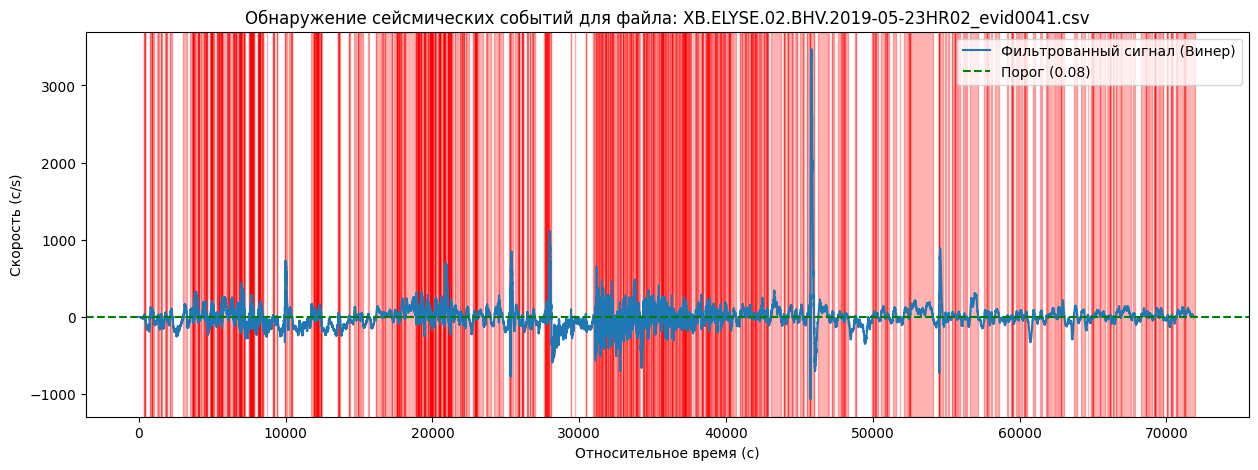

Обнаружено 1048 сейсмических событий в файле ./data/mars/test/data/XB.ELYSE.02.BHV.2019-05-23HR02_evid0041.csv.
Событие 1: Начало - 320, Конец - 325, Длительность - 5 сэмплов
Событие 2: Начало - 327, Конец - 409, Длительность - 82 сэмплов
Событие 3: Начало - 412, Конец - 413, Длительность - 1 сэмплов
Событие 4: Начало - 417, Конец - 419, Длительность - 2 сэмплов
Событие 5: Начало - 420, Конец - 421, Длительность - 1 сэмплов
Событие 6: Начало - 750, Конец - 751, Длительность - 1 сэмплов
Событие 7: Начало - 752, Конец - 865, Длительность - 113 сэмплов
Событие 8: Начало - 866, Конец - 874, Длительность - 8 сэмплов
Событие 9: Начало - 876, Конец - 878, Длительность - 2 сэмплов
Событие 10: Начало - 879, Конец - 883, Длительность - 4 сэмплов
Событие 11: Начало - 885, Конец - 1024, Длительность - 139 сэмплов
Событие 12: Начало - 1261, Конец - 1264, Длительность - 3 сэмплов
Событие 13: Начало - 1274, Конец - 1275, Длительность - 1 сэмплов
Событие 14: Начало - 1277, Конец - 1345, Длительность -

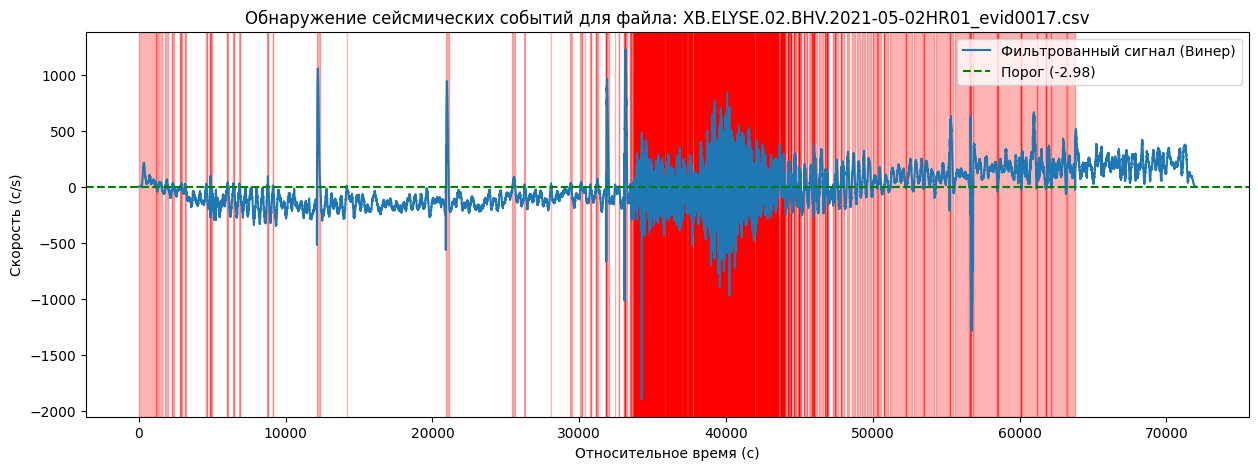

Обнаружено 2202 сейсмических событий в файле ./data/mars/test/data/XB.ELYSE.02.BHV.2021-05-02HR01_evid0017.csv.
Событие 1: Начало - 0, Конец - 1195, Длительность - 1195 сэмплов
Событие 2: Начало - 1197, Конец - 1204, Длительность - 7 сэмплов
Событие 3: Начало - 1302, Конец - 1549, Длительность - 247 сэмплов
Событие 4: Начало - 1813, Конец - 1967, Длительность - 154 сэмплов
Событие 5: Начало - 2264, Конец - 2265, Длительность - 1 сэмплов
Событие 6: Начало - 2267, Конец - 2367, Длительность - 100 сэмплов
Событие 7: Начало - 2822, Конец - 2826, Длительность - 4 сэмплов
Событие 8: Начало - 2832, Конец - 2848, Длительность - 16 сэмплов
Событие 9: Начало - 2854, Конец - 2947, Длительность - 93 сэмплов
Событие 10: Начало - 3118, Конец - 3170, Длительность - 52 сэмплов
Событие 11: Начало - 3173, Конец - 3174, Длительность - 1 сэмплов
Событие 12: Начало - 3177, Конец - 3182, Длительность - 5 сэмплов
Событие 13: Начало - 4557, Конец - 4610, Длительность - 53 сэмплов
Событие 14: Начало - 4617, Ко

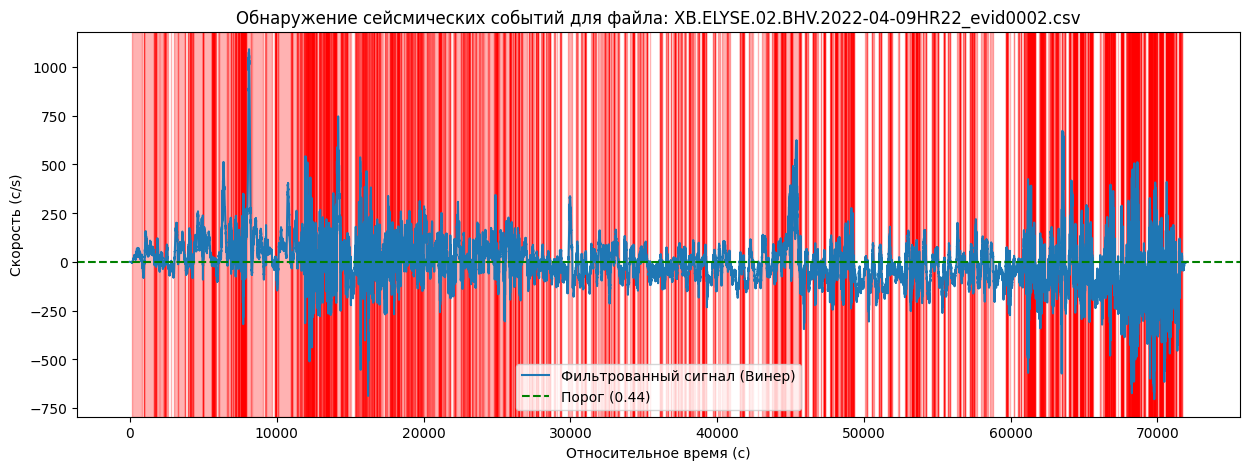

Обнаружено 2214 сейсмических событий в файле ./data/mars/test/data/XB.ELYSE.02.BHV.2022-04-09HR22_evid0002.csv.
Событие 1: Начало - 165, Конец - 822, Длительность - 657 сэмплов
Событие 2: Начало - 973, Конец - 975, Длительность - 2 сэмплов
Событие 3: Начало - 980, Конец - 981, Длительность - 1 сэмплов
Событие 4: Начало - 983, Конец - 984, Длительность - 1 сэмплов
Событие 5: Начало - 985, Конец - 1658, Длительность - 673 сэмплов
Событие 6: Начало - 1661, Конец - 1663, Длительность - 2 сэмплов
Событие 7: Начало - 1669, Конец - 1671, Длительность - 2 сэмплов
Событие 8: Начало - 1688, Конец - 1689, Длительность - 1 сэмплов
Событие 9: Начало - 1691, Конец - 1695, Длительность - 4 сэмплов
Событие 10: Начало - 1697, Конец - 1756, Длительность - 59 сэмплов
Событие 11: Начало - 1758, Конец - 1759, Длительность - 1 сэмплов
Событие 12: Начало - 1761, Конец - 1764, Длительность - 3 сэмплов
Событие 13: Начало - 1766, Конец - 1770, Длительность - 4 сэмплов
Событие 14: Начало - 1802, Конец - 1958, Дл

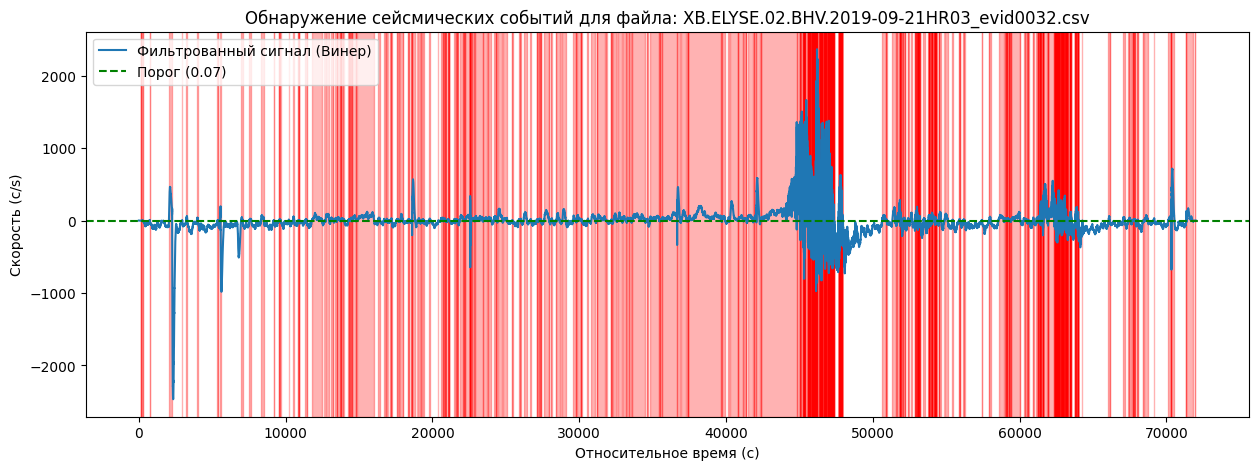

Обнаружено 947 сейсмических событий в файле ./data/mars/test/data/XB.ELYSE.02.BHV.2019-09-21HR03_evid0032.csv.
Событие 1: Начало - 117, Конец - 119, Длительность - 2 сэмплов
Событие 2: Начало - 120, Конец - 121, Длительность - 1 сэмплов
Событие 3: Начало - 133, Конец - 138, Длительность - 5 сэмплов
Событие 4: Начало - 153, Конец - 161, Длительность - 8 сэмплов
Событие 5: Начало - 233, Конец - 262, Длительность - 29 сэмплов
Событие 6: Начало - 275, Конец - 276, Длительность - 1 сэмплов
Событие 7: Начало - 732, Конец - 733, Длительность - 1 сэмплов
Событие 8: Начало - 734, Конец - 739, Длительность - 5 сэмплов
Событие 9: Начало - 2049, Конец - 2266, Длительность - 217 сэмплов
Событие 10: Начало - 2953, Конец - 2961, Длительность - 8 сэмплов
Событие 11: Начало - 3214, Конец - 3301, Длительность - 87 сэмплов
Событие 12: Начало - 3952, Конец - 4038, Длительность - 86 сэмплов
Событие 13: Начало - 5357, Конец - 5360, Длительность - 3 сэмплов
Событие 14: Начало - 5373, Конец - 5379, Длительнос

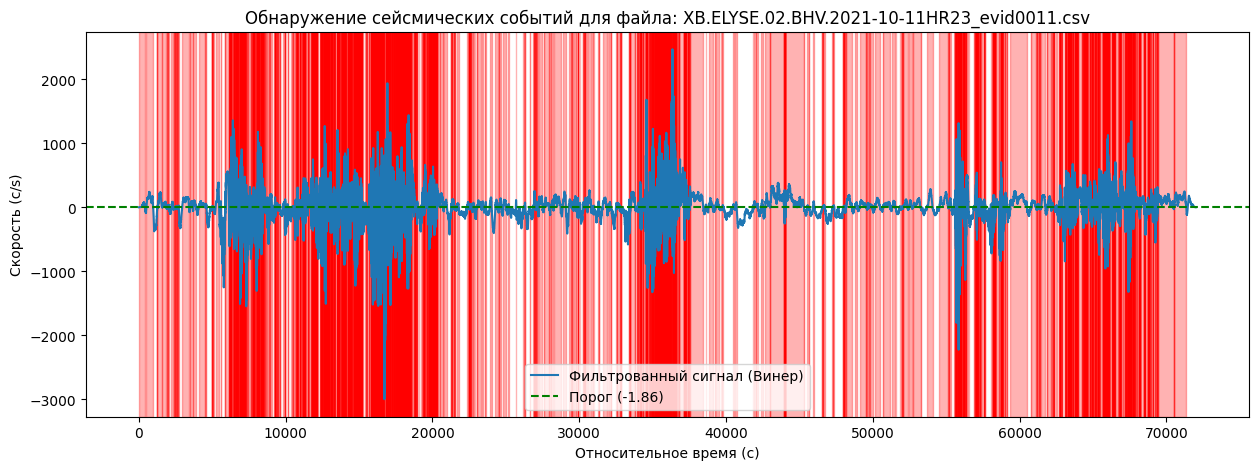

Обнаружено 3091 сейсмических событий в файле ./data/mars/test/data/XB.ELYSE.02.BHV.2021-10-11HR23_evid0011.csv.
Событие 1: Начало - 0, Конец - 418, Длительность - 418 сэмплов
Событие 2: Начало - 513, Конец - 971, Длительность - 458 сэмплов
Событие 3: Начало - 1256, Конец - 1257, Длительность - 1 сэмплов
Событие 4: Начало - 1258, Конец - 1260, Длительность - 2 сэмплов
Событие 5: Начало - 1264, Конец - 1266, Длительность - 2 сэмплов
Событие 6: Начало - 1269, Конец - 1582, Длительность - 313 сэмплов
Событие 7: Начало - 1589, Конец - 1880, Длительность - 291 сэмплов
Событие 8: Начало - 1930, Конец - 1938, Длительность - 8 сэмплов
Событие 9: Начало - 1940, Конец - 1944, Длительность - 4 сэмплов
Событие 10: Начало - 1945, Конец - 1964, Длительность - 19 сэмплов
Событие 11: Начало - 1966, Конец - 1969, Длительность - 3 сэмплов
Событие 12: Начало - 1972, Конец - 2057, Длительность - 85 сэмплов
Событие 13: Начало - 2223, Конец - 2343, Длительность - 120 сэмплов
Событие 14: Начало - 2396, Конец 

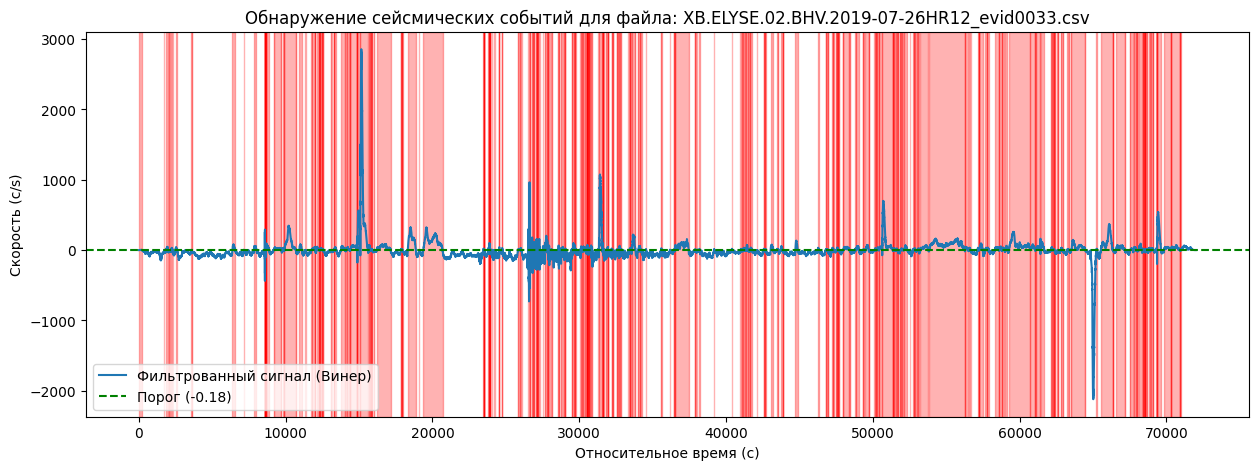

Обнаружено 468 сейсмических событий в файле ./data/mars/test/data/XB.ELYSE.02.BHV.2019-07-26HR12_evid0033.csv.
Событие 1: Начало - 0, Конец - 208, Длительность - 208 сэмплов
Событие 2: Начало - 1738, Конец - 1746, Длительность - 8 сэмплов
Событие 3: Начало - 1860, Конец - 1988, Длительность - 128 сэмплов
Событие 4: Начало - 2081, Конец - 2085, Длительность - 4 сэмплов
Событие 5: Начало - 2086, Конец - 2087, Длительность - 1 сэмплов
Событие 6: Начало - 2197, Конец - 2289, Длительность - 92 сэмплов
Событие 7: Начало - 2314, Конец - 2315, Длительность - 1 сэмплов
Событие 8: Начало - 2499, Конец - 2588, Длительность - 89 сэмплов
Событие 9: Начало - 3580, Конец - 3588, Длительность - 8 сэмплов
Событие 10: Начало - 3604, Конец - 3605, Длительность - 1 сэмплов
Событие 11: Начало - 6376, Конец - 6567, Длительность - 191 сэмплов
Событие 12: Начало - 7141, Конец - 7148, Длительность - 7 сэмплов
Событие 13: Начало - 7836, Конец - 8010, Длительность - 174 сэмплов
Событие 14: Начало - 8573, Конец -

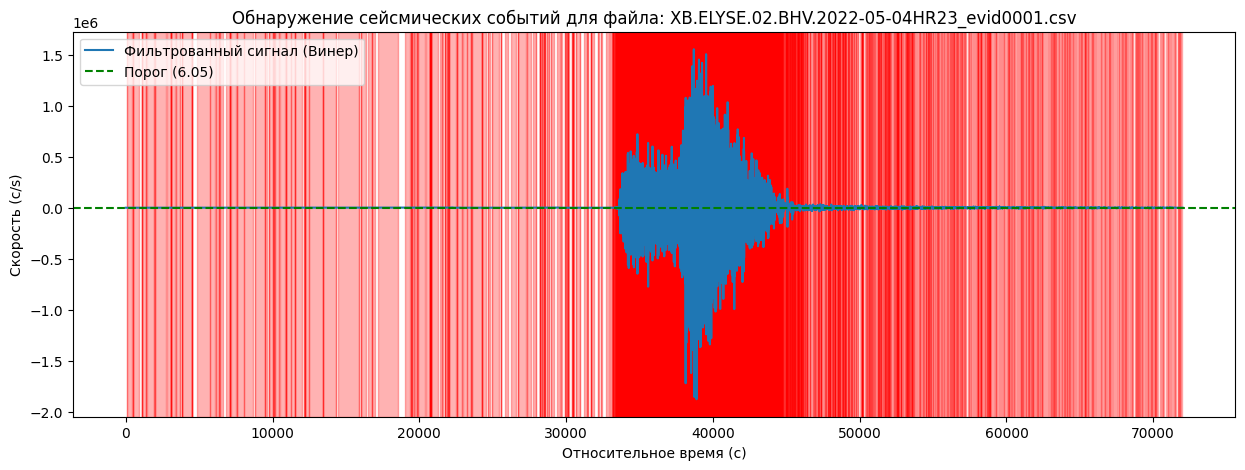

Обнаружено 3507 сейсмических событий в файле ./data/mars/test/data/XB.ELYSE.02.BHV.2022-05-04HR23_evid0001.csv.
Событие 1: Начало - 102, Конец - 103, Длительность - 1 сэмплов
Событие 2: Начало - 106, Конец - 443, Длительность - 337 сэмплов
Событие 3: Начало - 509, Конец - 511, Длительность - 2 сэмплов
Событие 4: Начало - 512, Конец - 513, Длительность - 1 сэмплов
Событие 5: Начало - 514, Конец - 517, Длительность - 3 сэмплов
Событие 6: Начало - 518, Конец - 932, Длительность - 414 сэмплов
Событие 7: Начало - 1115, Конец - 1119, Длительность - 4 сэмплов
Событие 8: Начало - 1120, Конец - 1126, Длительность - 6 сэмплов
Событие 9: Начало - 1128, Конец - 1135, Длительность - 7 сэмплов
Событие 10: Начало - 1136, Конец - 1137, Длительность - 1 сэмплов
Событие 11: Начало - 1139, Конец - 1387, Длительность - 248 сэмплов
Событие 12: Начало - 1390, Конец - 1393, Длительность - 3 сэмплов
Событие 13: Начало - 1395, Конец - 1396, Длительность - 1 сэмплов
Событие 14: Начало - 1429, Конец - 1942, Длит

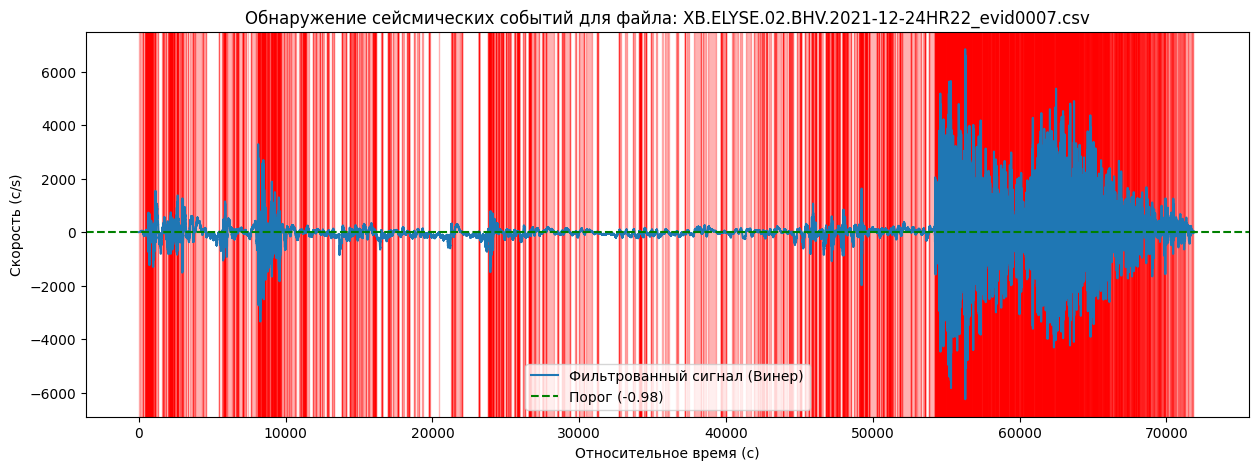

Обнаружено 2875 сейсмических событий в файле ./data/mars/test/data/XB.ELYSE.02.BHV.2021-12-24HR22_evid0007.csv.
Событие 1: Начало - 0, Конец - 25, Длительность - 25 сэмплов
Событие 2: Начало - 54, Конец - 286, Длительность - 232 сэмплов
Событие 3: Начало - 289, Конец - 291, Длительность - 2 сэмплов
Событие 4: Начало - 294, Конец - 297, Длительность - 3 сэмплов
Событие 5: Начало - 299, Конец - 300, Длительность - 1 сэмплов
Событие 6: Начало - 417, Конец - 418, Длительность - 1 сэмплов
Событие 7: Начало - 429, Конец - 434, Длительность - 5 сэмплов
Событие 8: Начало - 435, Конец - 445, Длительность - 10 сэмплов
Событие 9: Начало - 448, Конец - 450, Длительность - 2 сэмплов
Событие 10: Начало - 452, Конец - 454, Длительность - 2 сэмплов
Событие 11: Начало - 458, Конец - 459, Длительность - 1 сэмплов
Событие 12: Начало - 462, Конец - 463, Длительность - 1 сэмплов
Событие 13: Начало - 477, Конец - 480, Длительность - 3 сэмплов
Событие 14: Начало - 482, Конец - 486, Длительность - 4 сэмплов
С

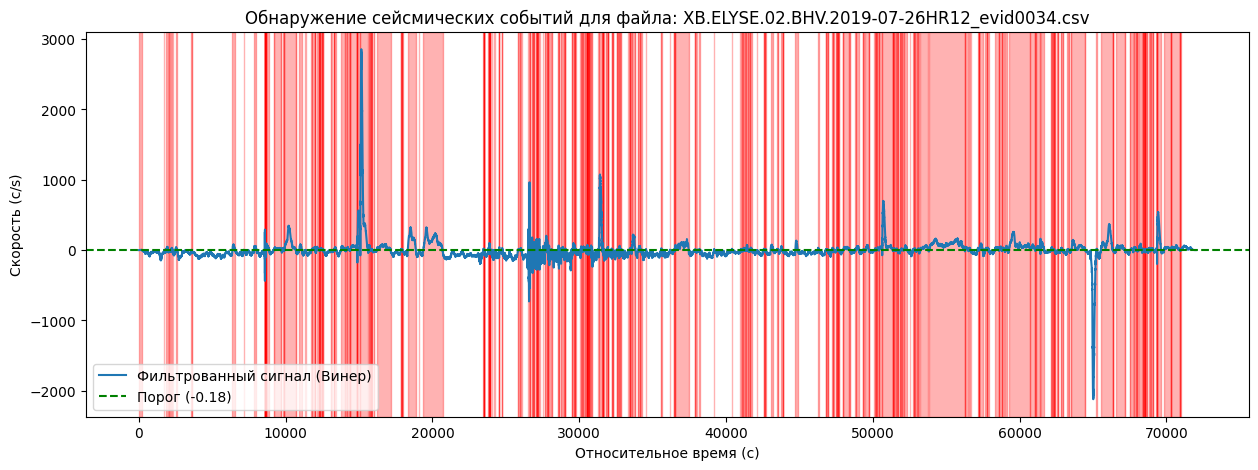

Обнаружено 468 сейсмических событий в файле ./data/mars/test/data/XB.ELYSE.02.BHV.2019-07-26HR12_evid0034.csv.
Событие 1: Начало - 0, Конец - 208, Длительность - 208 сэмплов
Событие 2: Начало - 1738, Конец - 1746, Длительность - 8 сэмплов
Событие 3: Начало - 1860, Конец - 1988, Длительность - 128 сэмплов
Событие 4: Начало - 2081, Конец - 2085, Длительность - 4 сэмплов
Событие 5: Начало - 2086, Конец - 2087, Длительность - 1 сэмплов
Событие 6: Начало - 2197, Конец - 2289, Длительность - 92 сэмплов
Событие 7: Начало - 2314, Конец - 2315, Длительность - 1 сэмплов
Событие 8: Начало - 2499, Конец - 2588, Длительность - 89 сэмплов
Событие 9: Начало - 3580, Конец - 3588, Длительность - 8 сэмплов
Событие 10: Начало - 3604, Конец - 3605, Длительность - 1 сэмплов
Событие 11: Начало - 6376, Конец - 6567, Длительность - 191 сэмплов
Событие 12: Начало - 7141, Конец - 7148, Длительность - 7 сэмплов
Событие 13: Начало - 7836, Конец - 8010, Длительность - 174 сэмплов
Событие 14: Начало - 8573, Конец -

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import wiener

# Директория с CSV-файлами
directory = './data/mars/test/data/'

# Функция для анализа сигнала в каждом файле
def analyze_file(file_path):
    print(f"Обработка файла: {file_path}")
    
    # Чтение данных из файла
    data = pd.read_csv(file_path)

    # Использование столбца 'velocity(c/s)' как сигнал
    signal = data['velocity(c/s)'].values

    # Применение фильтра Винера для удаления шума
    filtered_signal_wiener = wiener(signal, mysize=29)

    # Рассчитываем среднее значение сигнала и определяем порог
    signal_mean = np.mean(filtered_signal_wiener)
    threshold = signal_mean * 2 # Порог в 2 раза больше среднего значения (можно настраивать)

    # Обнаружение событий на основе порога
    def detect_events(signal, threshold):
        events = []
        in_event = False
        start = 0

        for i in range(len(signal)):
            if signal[i] > threshold and not in_event:
                # Начало события
                in_event = True
                start = i
            elif signal[i] <= threshold and in_event:
                # Конец события
                in_event = False
                end = i
                events.append((start, end))

        return events

    events = detect_events(filtered_signal_wiener, threshold)

    # Визуализация обнаруженных событий
    plt.figure(figsize=(15, 5))
    times = np.arange(len(signal))
    plt.plot(times, filtered_signal_wiener, label='Фильтрованный сигнал (Винер)')
    plt.axhline(y=threshold, color='green', linestyle='--', label=f'Порог ({threshold:.2f})')

    for start, end in events:
        plt.axvspan(start, end, color='red', alpha=0.3)

    plt.title(f"Обнаружение сейсмических событий для файла: {os.path.basename(file_path)}")
    plt.xlabel("Относительное время (с)")
    plt.ylabel("Скорость (c/s)")
    plt.legend()
    plt.show()

    # Вывод результатов
    print(f"Обнаружено {len(events)} сейсмических событий в файле {file_path}.")
    for i, (start, end) in enumerate(events):
        print(f"Событие {i+1}: Начало - {start}, Конец - {end}, Длительность - {end - start} сэмплов")

# Проходим по всем файлам в директории
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        analyze_file(file_path)

-5.691285584509948e-13
(-0.00)


/Users/dosya/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


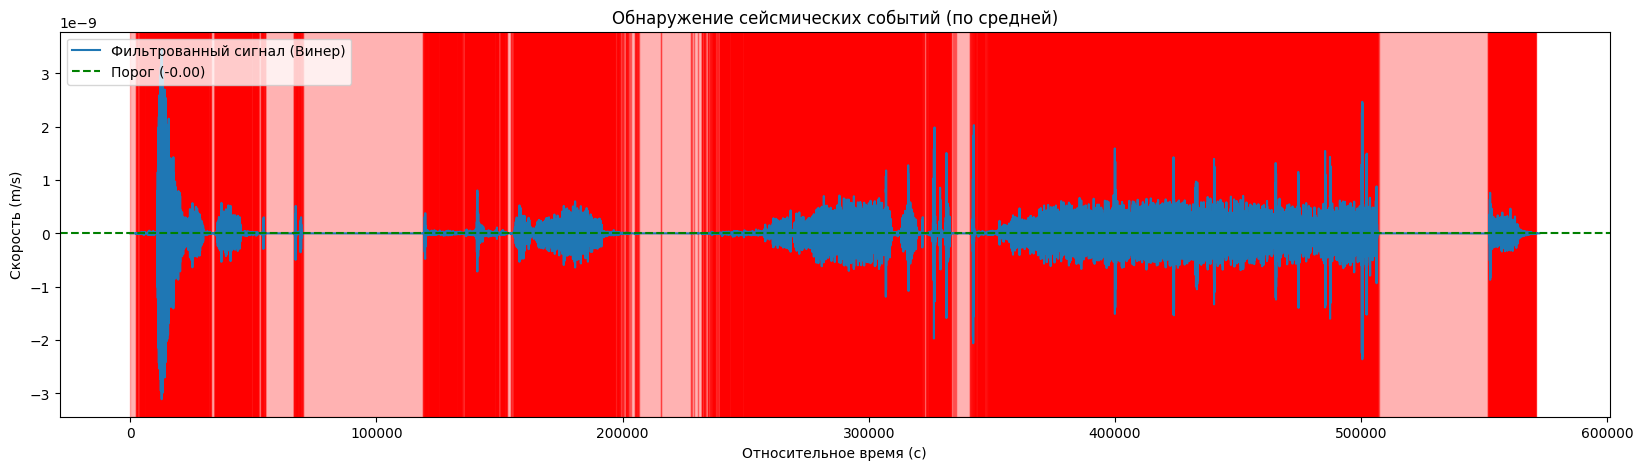

Обнаружено 32355 сейсмических событий.
Событие 1: Начало - 0, Конец - 2146, Длительность - 2146 сэмплов
Событие 2: Начало - 2167, Конец - 2220, Длительность - 53 сэмплов
Событие 3: Начало - 2227, Конец - 2510, Длительность - 283 сэмплов
Событие 4: Начало - 2519, Конец - 2556, Длительность - 37 сэмплов
Событие 5: Начало - 2573, Конец - 2575, Длительность - 2 сэмплов
Событие 6: Начало - 2587, Конец - 2633, Длительность - 46 сэмплов
Событие 7: Начало - 2637, Конец - 2734, Длительность - 97 сэмплов
Событие 8: Начало - 2736, Конец - 2743, Длительность - 7 сэмплов
Событие 9: Начало - 2744, Конец - 2792, Длительность - 48 сэмплов
Событие 10: Начало - 2793, Конец - 2800, Длительность - 7 сэмплов
Событие 11: Начало - 2805, Конец - 2807, Длительность - 2 сэмплов
Событие 12: Начало - 2887, Конец - 2924, Длительность - 37 сэмплов
Событие 13: Начало - 2965, Конец - 3196, Длительность - 231 сэмплов
Событие 14: Начало - 3226, Конец - 3283, Длительность - 57 сэмплов
Событие 15: Начало - 3297, Конец - 

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import wiener

# Функция для загрузки данных
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Функция для обнаружения событий на основе порога
def detect_events(signal, threshold):
    events = []
    in_event = False
    start = 0
    
    for i in range(len(signal)):
        if signal[i] > threshold and not in_event:
            # Начало события
            in_event = True
            start = i
        elif signal[i] <= threshold and in_event:
            # Конец события
            in_event = False
            end = i
            events.append((start, end))
    
    return events

# Основная часть кода
file_path = './data/lunar/test/data/S12_GradeB/xa.s12.00.mhz.1969-12-16HR00_evid00006.csv'
data = load_data(file_path)

# Использование столбца 'velocity(m/s)' как сигнал
signal = data['velocity(m/s)'].values

# Применение фильтра Винера для удаления шума
filtered_signal_wiener = wiener(signal, mysize=29)

# Рассчитываем среднее значение сигнала после фильтрации
signal_mean = np.mean(filtered_signal_wiener)
print('среднее значение: '+ signal_mean)
threshold = signal_mean * 2 

 # Порог в 2 раза больше среднего значения (можно настраивать)

# Обнаружение событий на основе порога
events = detect_events(filtered_signal_wiener, threshold)

# Визуализация обнаруженных событий
plt.figure(figsize=(20, 5))
times = np.arange(len(signal))
plt.plot(times, filtered_signal_wiener, label='Фильтрованный сигнал (Винер)')
plt.axhline(y=threshold, color='green', linestyle='--', 
            label=f'Порог ({threshold:.2f})')

for start, end in events:
    plt.axvspan(start, end, color='red', alpha=0.3)

plt.title("Обнаружение сейсмических событий (по средней)")
plt.xlabel("Относительное время (с)")
plt.ylabel("Скорость (m/s)")
plt.legend()
plt.show()

# Вывод результатов
print(f"Обнаружено {len(events)} сейсмических событий.")
for i, (start, end) in enumerate(events):
    print(f"Событие {i+1}: Начало - {start}, Конец - {end}, Длительность - {end - start} сэмплов")